In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
from magicgui import magicgui
import napari
from napari.utils import nbscreenshot
from napari.types import ImageData, LabelsData, LayerDataTuple

In [2]:
# the block of code below is a function to process image data and parsed to a widget
def segment_image(image: ImageData) -> LayerDataTuple:
    """Apply thresholding and connected component analysis"""
    from skimage.filters import threshold_otsu
    from skimage.measure import label
    
    binary = image > threshold_otsu(image)
    labels = label(binary)
    
    output_tuple = (label, # first parameter of the tuple: data
                    {'name': 'Output Label Image', 'opacity': 0.3}, # second parameter of the tuple: layer properties
                    'labels') # third parameter of the tuple: layer type
    
    return output_tuple

In [3]:
image = imread("../../data/blobs.tif")
# binary_image = segment_image(image)

# fig, ax = plt.subplots(1,2)
# plt.imshow(image, cmap = 'gray')
# ax[1].imshow(binary_image, cmap = 'gray')

In [4]:
viewer = napari.Viewer() # Open napari Viewer
viewer.add_image(image, name = 'blobs') # Add blobs image to napari as an image layer
# viewer.add_image(binary_image, name = 'binarized') # Add denoised image to napari as an image layer (denoised from function)
viewer.grid.enabled = True # Activate grid mode by code

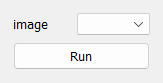

In [5]:
segment_image_widget = magicgui(segment_image)
segment_image_widget

In [6]:
viewer.window.add_dock_widget(segment_image_widget)
# binarized_from_widget = segment_image_widget()
# nbscreenshot(viewer)
segment_image_widget()

TypeError: 'function' object is not iterable